<a href="https://colab.research.google.com/github/nadavschwalb/image_processing/blob/main/Lab_6_preliminary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
%matplotlib inline 
import numpy as np
from scipy.fftpack import dct
import matplotlib.pyplot as plt

In [ ]:
#Mount:
from google.colab import drive
drive.mount('/content/drive')

In [19]:
def my_dct(x):
  N = x.shape[0]
  X = np.zeros(N)
  for k in np.arange(N):
    for n in np.arange(N):
      X[k] += x[n]*np.cos((np.pi*k*(2*n+1))/(2*N))
    X[k] *= 2
  return X


In [21]:
def my_dct_fft(x):
  N = x.shape[0]
  k = np.arange(N)
  X = np.empty(2*N)
  X[:N] = x
  X[N:] = x[::-1]
  X = np.fft.fft(X)[:N]
  X *= np.exp(-1j*np.pi*k/(2*N))
  return X.real


In [22]:
x = np.array([4,3,5,6])
print(my_dct(x))
print(my_dct_fft(x))
print(dct(x))


[36.         -5.22625186  2.82842712  2.1647844 ]
[36.         -5.22625186  2.82842712  2.1647844 ]
[36.         -5.22625186  2.82842712  2.1647844 ]


my_dct passed: my_dct error  = 4.6629367034256575e-15
my_dct_fft passed: my_dct_fft error  = 5.204170427930421e-16


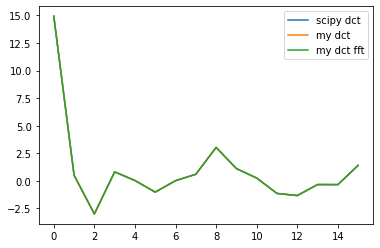

In [63]:
N = 16
x = np.random.rand(N)
w = np.arange(N)

plt.plot(w,dct(x))
plt.plot(w,my_dct(x))
plt.plot(w,my_dct_fft(x))
plt.legend(['scipy dct','my dct','my dct fft'])


my_dct_error = np.max(np.sqrt(np.square(dct(x)-my_dct(x)))) # max square error
my_dct_fft_error = np.max(np.sqrt(np.square(dct(x)-my_dct_fft(x)))) # max square error
if my_dct_error < 10e-10:
  print(f"my_dct passed: my_dct error  = {my_dct_error}")
else:
  print("my_dct failed")
if my_dct_fft_error < 10e-10:
  print(f"my_dct_fft passed: my_dct_fft error  = {my_dct_fft_error}")
else:
  print("my_dct_fft failed")       

In [64]:
def zigzag(M,N):
  zigzag_order = [[] for i in range(M+N-1)]
  for i in range(M):
    for j in range(N):
      diagonal_num = i+j
      if diagonal_num%2 == 0:
        zigzag_order[diagonal_num].append(i*N + j) # even row up
      else:
        zigzag_order[diagonal_num].insert(0,i*N + j) #odd row down
        
  result = []
  for diag in zigzag_order:
    for j in diag:
      result.append(j)
  return result


In [65]:
print(zigzag(3,4))
print(zigzag(4,4))
print(zigzag(8,8))
print(zigzag(16,16))


[0, 4, 1, 2, 5, 8, 9, 6, 3, 7, 10, 11]
[0, 4, 1, 2, 5, 8, 12, 9, 6, 3, 7, 10, 13, 14, 11, 15]
[0, 8, 1, 2, 9, 16, 24, 17, 10, 3, 4, 11, 18, 25, 32, 40, 33, 26, 19, 12, 5, 6, 13, 20, 27, 34, 41, 48, 56, 49, 42, 35, 28, 21, 14, 7, 15, 22, 29, 36, 43, 50, 57, 58, 51, 44, 37, 30, 23, 31, 38, 45, 52, 59, 60, 53, 46, 39, 47, 54, 61, 62, 55, 63]
[0, 16, 1, 2, 17, 32, 48, 33, 18, 3, 4, 19, 34, 49, 64, 80, 65, 50, 35, 20, 5, 6, 21, 36, 51, 66, 81, 96, 112, 97, 82, 67, 52, 37, 22, 7, 8, 23, 38, 53, 68, 83, 98, 113, 128, 144, 129, 114, 99, 84, 69, 54, 39, 24, 9, 10, 25, 40, 55, 70, 85, 100, 115, 130, 145, 160, 176, 161, 146, 131, 116, 101, 86, 71, 56, 41, 26, 11, 12, 27, 42, 57, 72, 87, 102, 117, 132, 147, 162, 177, 192, 208, 193, 178, 163, 148, 133, 118, 103, 88, 73, 58, 43, 28, 13, 14, 29, 44, 59, 74, 89, 104, 119, 134, 149, 164, 179, 194, 209, 224, 240, 225, 210, 195, 180, 165, 150, 135, 120, 105, 90, 75, 60, 45, 30, 15, 31, 46, 61, 76, 91, 106, 121, 136, 151, 166, 181, 196, 211, 226, 241, 242